**Section 5B**
2/6/25

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Task 1: Fermi-Dirac Statistics

Grand canonical ensemble has constant volume, temperature, and chemical potential, but it can exchange heat and particles with a reservoir. 

$ \Xi(z, \beta) = \prod_{j=1}^{M} \left(1 + z \, e^{-\beta j \epsilon}\right), \quad \text{where } z = e^{\beta \mu}. $

# Task 2: Bose-Einstein Condensate (BEC)

**Part a) Microstates**

2 level system with energy levels $E_0=0, E_1=\epsilon$. Total of N indistinguishable bosons. 

Number in the ground state: $n_0=0, 1, 2, 3, ... N$ and $n_1=N-n_0$. <br>
Energy of the microstate is $E=0*n_0+\epsilon*n_1 = \epsilon*(N-n_0)$. <br>
There are N+1 microstates in total, corresponding to $n_0=0, 1, 2, ... N$.

**Part b) (classical) partition function under the canonical ensemble**

$$Z _C = \sum_{n_0=0}^{N} \binom{N}{n_0} e^{-\beta E}$$
$$\binom{N}{n_0} = \frac{N!}{n_0!(N-n_0)!} = \frac{N!}{n_0!n_1!}$$
$$E = \epsilon(N-n_0)$$

$$Z_C = (1+e^{-\beta \epsilon})^N$$

The binomial factor is needed because it takes into account the number of possible configurations for indistinguishable particles. 
The probability of finding a particular microstate with energy E is 
$$P(E) = \frac{e^{-\beta E}}{Z_C}$$

**Part c) (Classical) Average particle number under the canonical ensemble**

$$\langle n_0\rangle_C = \frac{N}{1+e^{-\beta \epsilon}}$$
$$\langle n_1\rangle = \frac{Ne^{-\beta \epsilon}}{1+e^{-\beta \epsilon}}$$

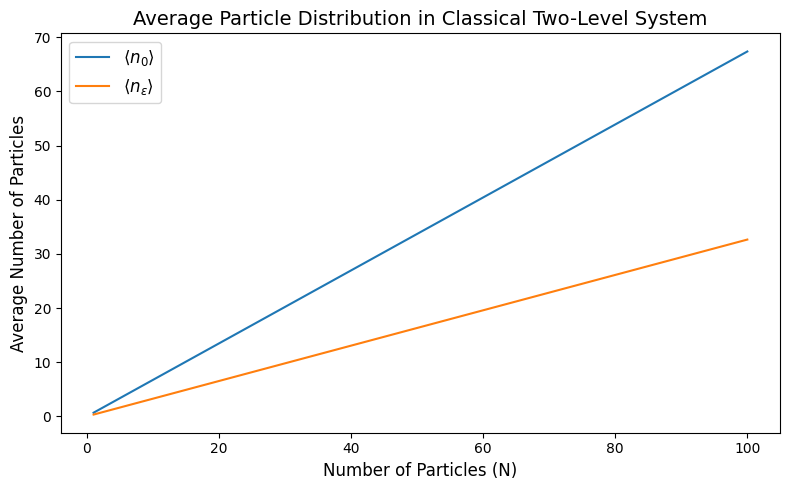

In [31]:
N = np.linspace(1, 100, 100)
epsilon = 2e-18 # energy of first excited state
kB = 1.38e-23
T = 2e5 # temp in K
beta = 1/(kB*T)

def n0(N):
    return N/(1+np.exp(-beta*epsilon))

def n1(N):
    return N*np.exp(-beta*epsilon)/(1+np.exp(-beta*epsilon))

plt.figure(figsize=(8, 5))
plt.plot(N, n0(N), label=r'$\langle n_0 \rangle$')
plt.plot(N, n1(N), label=r'$\langle n_\epsilon \rangle$')
plt.xlabel('Number of Particles (N)', fontsize=12)
plt.ylabel('Average Number of Particles', fontsize=12)
plt.title('Average Particle Distribution in Classical Two-Level System', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Part d) (Quantum) partition function under the canonical ensemble**

$$Z = \frac{1-e^{-\beta \epsilon (N+1)}}{1-e^{-\beta \epsilon}}$$
Probability of a certain microstate is: 
$$P(E) = \frac{e^{-\beta n_1 \epsilon}}{Z} = \frac{(1-e^{-\beta \epsilon})e^{-\beta n_1 \epsilon}}{1-e^{-\beta \epsilon (N+1)}}$$

**Part e) (Quantum) Average particle number under the canonical ensemble**

$$\langle n_{1} \rangle = \frac{e^{-\beta \epsilon}}{1-e^{-\beta \epsilon}} - \frac{(N+1)e^{-\beta \epsilon (N+1)}}{1-e^{-\beta \epsilon (N+1)}}$$
$$\langle n_{0} \rangle = N - \langle n_{1} \rangle$$

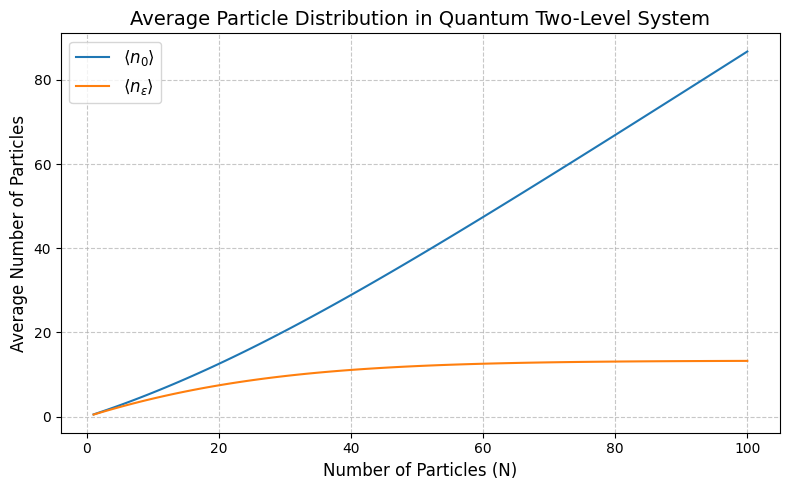

In [32]:
N = np.linspace(1, 100, 100)
epsilon = 2e-18 # energy of first excited state
kB = 1.38e-23
T = 2e6 # temp in K
beta = 1/(kB*T)

def n1q(N):
    return np.exp(-beta*epsilon)/(1-np.exp(-beta*epsilon)) - (N+1)*np.exp(-beta*epsilon*(N+1))/(1-np.exp(-beta*epsilon*(N+1)))

def n0q(N):
    return N - n1q(N)

plt.figure(figsize=(8, 5))
plt.plot(N, n0q(N), label=r'$\langle n_0 \rangle$')
plt.plot(N, n1q(N), label=r'$\langle n_\epsilon \rangle$')
plt.xlabel('Number of Particles (N)', fontsize=12)
plt.ylabel('Average Number of Particles', fontsize=12)
plt.title('Average Particle Distribution in Quantum Two-Level System', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Part f) (Quantum) quantum partition function under the Grand canonical ensemble**

$\Omega_G = \frac{1}{(1-z)(1-z e^{-\beta \epsilon})}$, with $z = e^{\beta\mu}$. <br>
$\mu$ is the chemical potential. 

The condition for a normalizable system is to have $\mu - \epsilon < 0$, or in other words, $\mu < \epsilon$. 

**Part g/h) (Quantum) Particle number under the Grand canonical ensemble**

Average ground state particle number:
$$\langle n_0 \rangle = k_B T \frac{\partial}{\partial{\mu}} \ln{(\Omega_G)}$$
$$= \frac{e^{\beta \mu}}{1-e^{\beta \mu}}$$

In [33]:
N = 1e5  # Total number of particles
epsilon = 2e-18  # Energy of the first excited state (J)
kB = 1.38e-23  # Boltzmann constant (J/K)
T = 2000  # Temperature (K)
beta = 1 / (kB * T)

# Approximation for z for large N
z = N / (N + 1)  # Fugacity

# Ground state population
n0 = z / (1 - z)

# Excited state population
n1 = (z * np.exp(-beta * epsilon)) / (1 - z * np.exp(-beta * epsilon))

print(f"Average number of particles in ground state: {n0:.2f}")
print(f"Average number of particles in excited state: {n1:.2e}")
print(f"Total particles: {n0 + n1:.2f}")

Average number of particles in ground state: 100000.00
Average number of particles in excited state: 3.38e-32
Total particles: 100000.00


Part i) (Near)-degenerate Bose systems

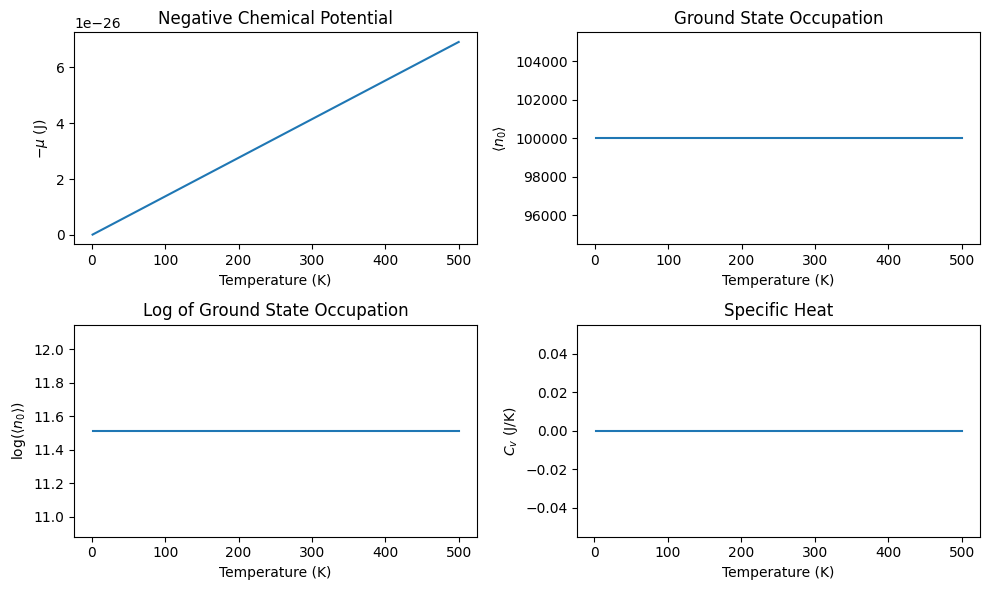

In [34]:
# Constants
N = 1e5  # Total number of bosons
epsilon = 2e-18  # Energy of the first excited state (J)
kB = 1.38e-23  # Boltzmann constant (J/K)
T_range = np.linspace(1, 500, 500)  # Temperature range in Kelvin
beta_range = 1 / (kB * T_range)

# Near-degenerate energy levels
delta_e = 1e-20  # Small energy splitting between degenerate states (J)
n_degenerate = 5  # Number of near-degenerate states

# Functions for calculations
def fugacity(N, beta):
    """Calculate fugacity (z) for large N."""
    z = N / (N + 1)
    return z

def ground_state_occupation(z):
    """Calculate ground state occupation, <n0>."""
    return z / (1 - z)

def excited_state_occupation(z, beta):
    """Calculate occupation for near-degenerate excited states."""
    return n_degenerate * (z * np.exp(-beta * epsilon)) / (1 - z * np.exp(-beta * epsilon))

def total_occupation(n0, n1):
    """Calculate total occupation."""
    return n0 + n1

def specific_heat(T, n0_gradient):
    """Calculate specific heat Cv."""
    return kB * T * n0_gradient

# Arrays for results
mu = []
n0_values = []
log_n0_values = []
n0_gradients = []
specific_heats = []

# Numerical calculations
for beta, T in zip(beta_range, T_range):
    z = fugacity(N, beta)
    n0 = ground_state_occupation(z)
    n1 = excited_state_occupation(z, beta)

    # Total occupation (should match N)
    total_n = total_occupation(n0, n1)

    # Negative chemical potential (mu)
    mu_val = -kB * T * np.log(z)
    mu.append(mu_val)

    # Ground state occupation
    n0_values.append(n0)

    # Log of ground state occupation
    log_n0_values.append(np.log(n0))

    # Gradient of n0 with respect to T (numerical derivative)
    if len(n0_values) > 1:
        gradient = (n0_values[-1] - n0_values[-2]) / (T_range[1] - T_range[0])
        n0_gradients.append(gradient)

        # Specific heat
        Cv = specific_heat(T, gradient)
        specific_heats.append(Cv)
    else:
        n0_gradients.append(0)
        specific_heats.append(0)

# Plot results
plt.figure(figsize=(10, 6))

# Negative chemical potential
plt.subplot(2, 2, 1)
plt.plot(T_range, mu, label=r"$-\mu$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$-\mu$ (J)")
plt.title("Negative Chemical Potential")

# Ground state occupation
plt.subplot(2, 2, 2)
plt.plot(T_range, n0_values, label=r"$\langle n_0 \rangle$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\langle n_0 \rangle$")
plt.title("Ground State Occupation")

# Log of ground state occupation
plt.subplot(2, 2, 3)
plt.plot(T_range, log_n0_values, label=r"$\log(\langle n_0 \rangle)$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\log(\langle n_0 \rangle)$")
plt.title("Log of Ground State Occupation")

# Specific heat
plt.subplot(2, 2, 4)
plt.plot(T_range[1:], specific_heats[1:], label=r"$C_v$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$C_v$ (J/K)")
plt.title("Specific Heat")

plt.tight_layout()
plt.show()

Part j) (Near)-degenerate Bose system, without BEC

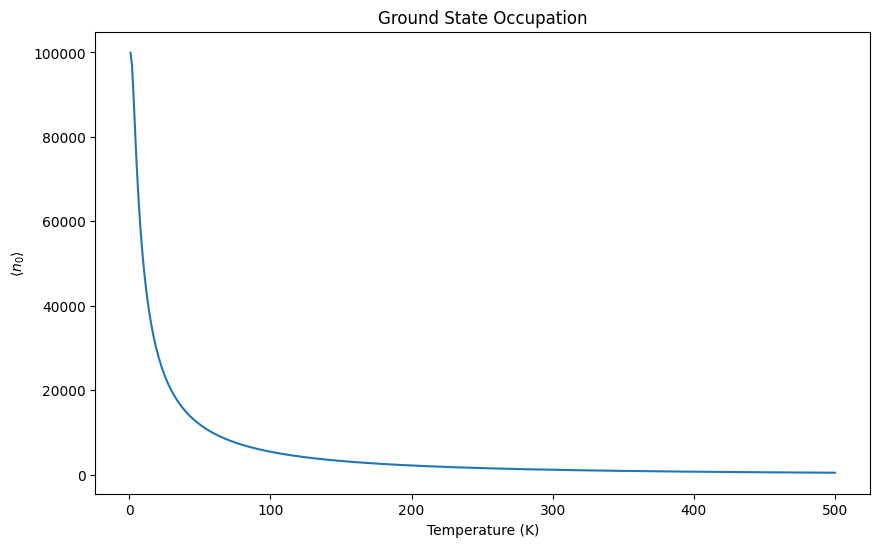

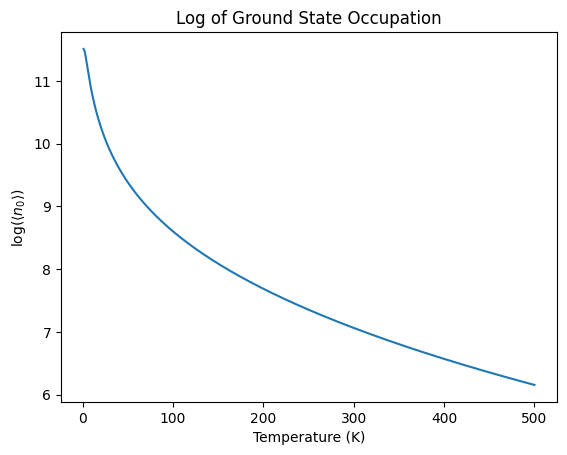

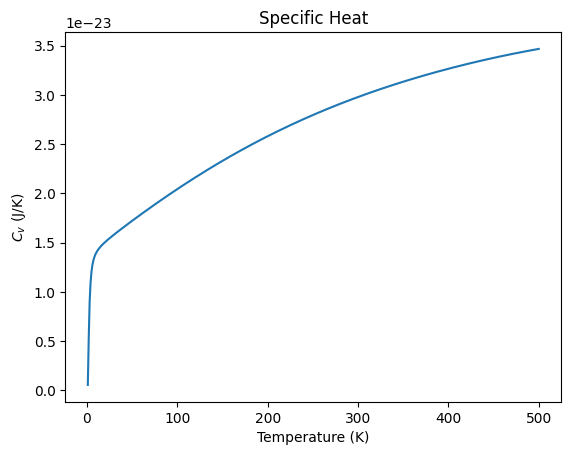

In [35]:
# Constants
N = 1e5  # Total number of bosons
kB = 1.38e-23  # Boltzmann constant (J/K)
T_range = np.linspace(1, 500, 500)  # Temperature range in Kelvin

# Modified energy levels and degeneracies
n_levels = 1000  # Number of energy levels
e_levels = np.linspace(1e-21, 1e-19, n_levels)  # Energy levels (J)
g_levels = np.linspace(1, 10, n_levels)**2  # Degeneracy grows as g(E) ~ E^2

# Functions for calculations
def partition_function(beta):
    """Calculate the partition function Z."""
    return np.sum(g_levels * np.exp(-beta * e_levels))

def average_occupation(beta):
    """Calculate average occupation numbers for each energy level."""
    Z = partition_function(beta)
    return (g_levels * np.exp(-beta * e_levels)) / Z

def specific_heat(beta, T):
    """Calculate specific heat Cv."""
    Z = partition_function(beta)
    E_avg = np.sum(g_levels * e_levels * np.exp(-beta * e_levels)) / Z
    E2_avg = np.sum(g_levels * (e_levels**2) * np.exp(-beta * e_levels)) / Z
    return kB * beta**2 * (E2_avg - E_avg**2)

# Arrays for results
mu = []
n0_values = []
specific_heats = []
log_n0_values = []

# Numerical calculations
for T in T_range:
    beta = 1 / (kB * T)
    occupations = average_occupation(beta)

    # Ground state occupation
    n0 = N * occupations[0]
    n0_values.append(n0)

    # Log of ground state occupation
    log_n0_values.append(np.log(n0))

    # Specific heat
    Cv = specific_heat(beta, T)
    specific_heats.append(Cv)

# Plot results
plt.figure(figsize=(10, 6))

# Ground state occupation
plt.plot(T_range, n0_values, label=r"$\langle n_0 \rangle$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\langle n_0 \rangle$")
plt.title("Ground State Occupation")
plt.show()
# Log of ground state occupation
plt.plot(T_range, log_n0_values, label=r"$\log(\langle n_0 \rangle)$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\log(\langle n_0 \rangle)$")
plt.title("Log of Ground State Occupation")
plt.show()
# Specific heat
plt.plot(T_range, specific_heats, label=r"$C_v$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$C_v$ (J/K)")
plt.title("Specific Heat")
plt.show()

Part k) (Near)-degenerate Bose system, with BEC

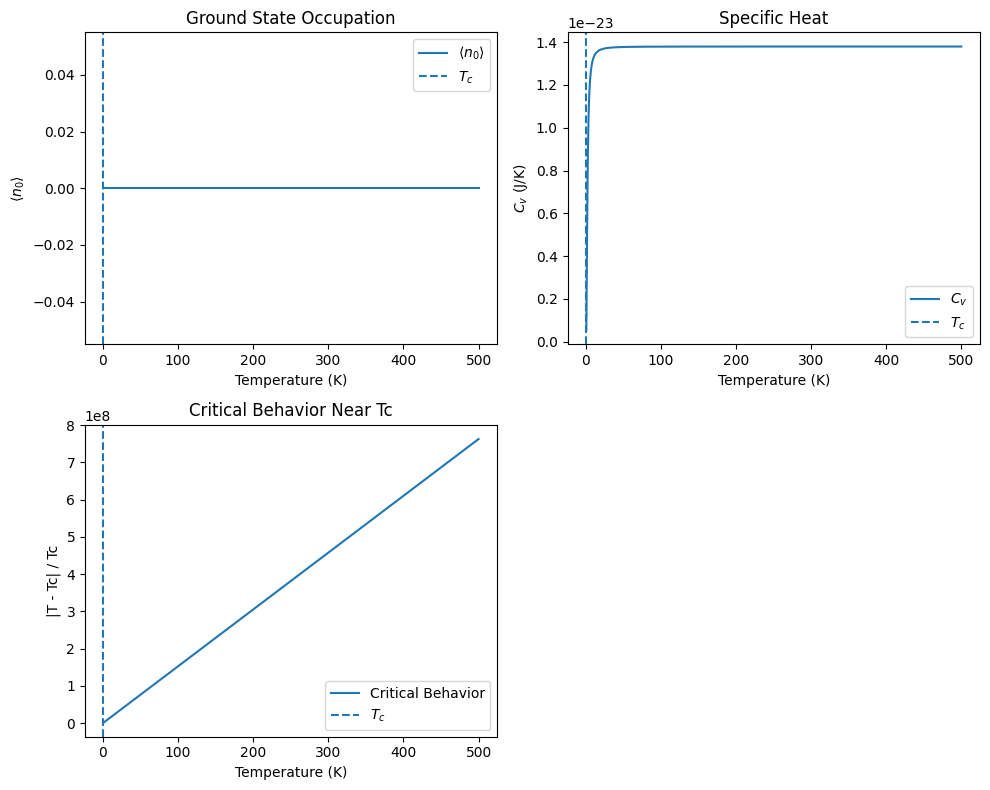

In [36]:
# Constants
N = 1e5  # Total number of bosons
kB = 1.38e-23  # Boltzmann constant (J/K)
T_range = np.linspace(1, 500, 500)  # Temperature range in Kelvin

# Energy levels and degeneracies for BEC system
n_levels = 1000  # Number of energy levels
e_levels = np.linspace(1e-21, 1e-19, n_levels)  # Energy levels (J)
g_levels = np.ones(n_levels)  # Constant degeneracy for simplicity

# Critical temperature Tc
def critical_temperature():
    return (2 * np.pi * (N / 1.202))**(2/3) * kB / (np.mean(e_levels) ** (2/3))

Tc = critical_temperature()

# Functions for calculations
def partition_function(beta):
    return np.sum(g_levels * np.exp(-beta * e_levels))

def average_occupation(beta):
    Z = partition_function(beta)
    return (g_levels * np.exp(-beta * e_levels)) / Z

def specific_heat(beta, T):
    Z = partition_function(beta)
    E_avg = np.sum(g_levels * e_levels * np.exp(-beta * e_levels)) / Z
    E2_avg = np.sum(g_levels * (e_levels**2) * np.exp(-beta * e_levels)) / Z
    return kB * beta**2 * (E2_avg - E_avg**2)

# Arrays for results
n0_values = []
specific_heats = []
critical_behavior = []

# Numerical calculations
for T in T_range:
    beta = 1 / (kB * T)
    occupations = average_occupation(beta)

    # Ground state occupation
    if T < Tc:
        n0 = N * (1 - (T / Tc)**(3/2))
    else:
        n0 = 0
    n0_values.append(n0)

    # Specific heat
    Cv = specific_heat(beta, T)
    specific_heats.append(Cv)

    # Critical behavior near Tc
    critical_behavior.append(abs((T - Tc) / Tc))

# Plot results
plt.figure(figsize=(10, 8))

# Ground state occupation
plt.subplot(2, 2, 1)
plt.plot(T_range, n0_values, label=r"$\langle n_0 \rangle$")
plt.axvline(Tc, linestyle='--', label="$T_c$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\langle n_0 \rangle$")
plt.title("Ground State Occupation")
plt.legend()

# Specific heat
plt.subplot(2, 2, 2)
plt.plot(T_range, specific_heats, label=r"$C_v$")
plt.axvline(Tc, linestyle='--', label="$T_c$")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$C_v$ (J/K)")
plt.title("Specific Heat")
plt.legend()
# Critical behavior
plt.subplot(2, 2, 3)
plt.plot(T_range, critical_behavior, label="Critical Behavior")
plt.axvline(Tc, linestyle='--', label="$T_c$")
plt.xlabel("Temperature (K)")
plt.ylabel("|T - Tc| / Tc")
plt.title("Critical Behavior Near Tc")
plt.legend()

plt.tight_layout()
plt.show()